In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from matplotlib.colors import LinearSegmentedColormap

def rollavg_pandas(a,n):
        'Pandas rolling average over data set a with window size n. Returns a centered np array of same size'
        return np.ravel(pd.DataFrame(a).rolling(n, center=True, min_periods=1).mean().to_numpy())

In [2]:
#0.9 fixed time
# file_RV = r"/Users/Chantal/Documents/Deep-QLearning-Agent-for-Traffic-Signal-Control/result_tests_28-30-31-32-33-34/results_fixed_time/28_0/plot_average_RV_delay_data.csv"
# file_CV = r"/Users/Chantal/Documents/Deep-QLearning-Agent-for-Traffic-Signal-Control/result_tests_28-30-31-32-33-34/results_fixed_time/28_0/plot_average_CV_delay_data.csv"
# file_delay = r"/Users/Chantal/Documents/Deep-QLearning-Agent-for-Traffic-Signal-Control/result_tests_28-30-31-32-33-34/results_fixed_time/28_0/plot_average_delay_data.csv"

#0.9 final agent 
file_RV = r"/Users/Chantal/Documents/Deep-QLearning-Agent-for-Traffic-Signal-Control/result_tests_28-30-31-32-33-34/32_0/plot_average_RV_delay_data.csv"
file_CV = r"/Users/Chantal/Documents/Deep-QLearning-Agent-for-Traffic-Signal-Control/result_tests_28-30-31-32-33-34/32_0/plot_average_CV_delay_data.csv"
file_delay = r"/Users/Chantal/Documents/Deep-QLearning-Agent-for-Traffic-Signal-Control/result_tests_28-30-31-32-33-34/32_0/plot_average_delay_data.csv"



data_RV = np.loadtxt(file_RV, delimiter=',')
data_CV = np.loadtxt(file_CV, delimiter=',')
data_delay = np.loadtxt(file_delay, delimiter=',')

data_RV[data_RV == 0] = np.nan
data_CV[data_CV == 0] = np.nan
data_delay[data_delay == 0] = np.nan



In [3]:

def plot_this(data, ylabel):


    
    
    median = np.nanmedian(data, axis=0)
    
    #exclude all medians for which we have less than 5 data points
    isnumber = sum(~np.isnan(data))
    median2 = np.copy(median)
    median2[isnumber < 10] = np.nan
    
    
    
    
    
    percentile95 = np.nanpercentile(data, 95, axis=0)
    percentile5 = np.nanpercentile(data, 5, axis=0)
    steps = np.arange(len(median))

    #apply a rolling window to make data more readable and less noisy
    roling_window = 10
    median = rollavg_pandas(median, roling_window)
    median2 = rollavg_pandas(median2, roling_window)
    percentile95 = rollavg_pandas(percentile95, roling_window)
    percentile5 = rollavg_pandas(percentile5, roling_window)


    #turn nan values into 0s for plotting only
    median = np.nan_to_num(median)
#     median2 = np.nan_to_num(median2)
    percentile95 = np.nan_to_num(percentile95)
    percentile5 = np.nan_to_num(percentile5)



    #plot figure. Plot both the error bars (percentiles) and median.
    plt.figure(figsize=(20, 11.25)) 
    plt.style.use('ggplot')
    plt.rcParams.update({'font.size': 24})  # set bigger font size

    ax = plt.subplot(111)  
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  

    #limit only to where the data is
    min_val = min(min(median),min(percentile5),min(percentile95))
    max_val = max(max(median),max(percentile5),max(percentile95))
    plt.ylim(min_val - 0.05 * abs(min_val), max_val + 0.05 * abs(max_val))
    plt.ylabel(ylabel)
    plt.xlabel("Episode")
    plt.margins(0)



    #plot the error bars in blue
    plt.fill_between(steps, percentile5, percentile95, color="#00a2e8") 
    #3F5D7D


    #plot the means in white
#     plt.plot(steps, median, color="black", lw=2,)  
    plt.plot(steps, median2, color="red", lw=2)  

    fig = plt.gcf()

    return np.nanmean(median2)


6.823256554520525


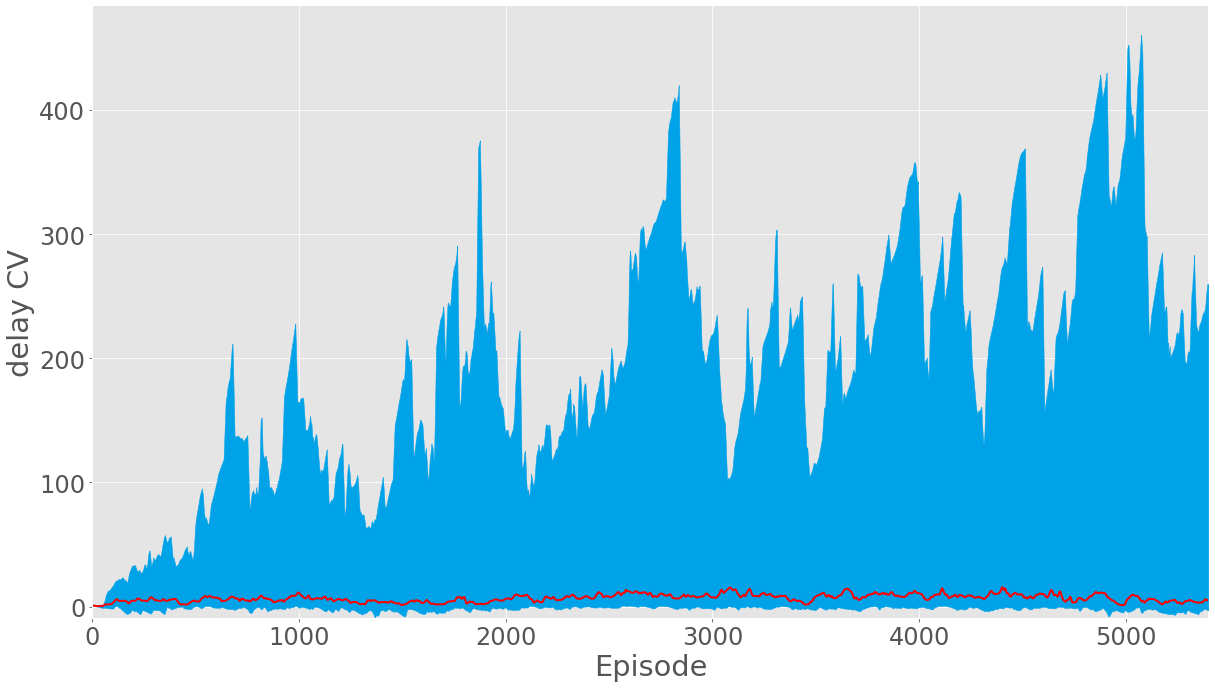

In [4]:
    #plot CV 90% low
m = plot_this(data_CV, 'delay CV')
print(m)




136.73178065450895


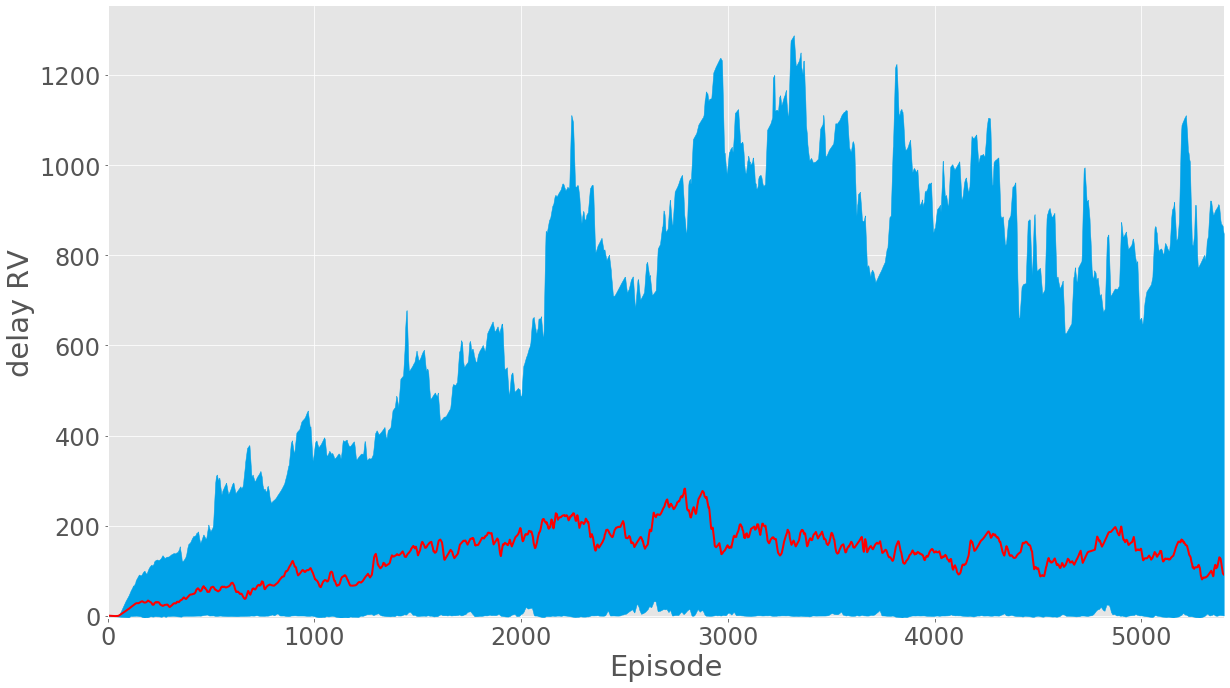

In [5]:
m = plot_this(data_RV, 'delay RV')

print(m)


# median_RV = np.nanmedian(data_RV, axis=0)
# isnumber = sum(~np.isnan(data_RV))

# median_RV2 = np.copy(median_RV)
# median_RV2[isnumber < 5] = np.nan





97.74949411195655


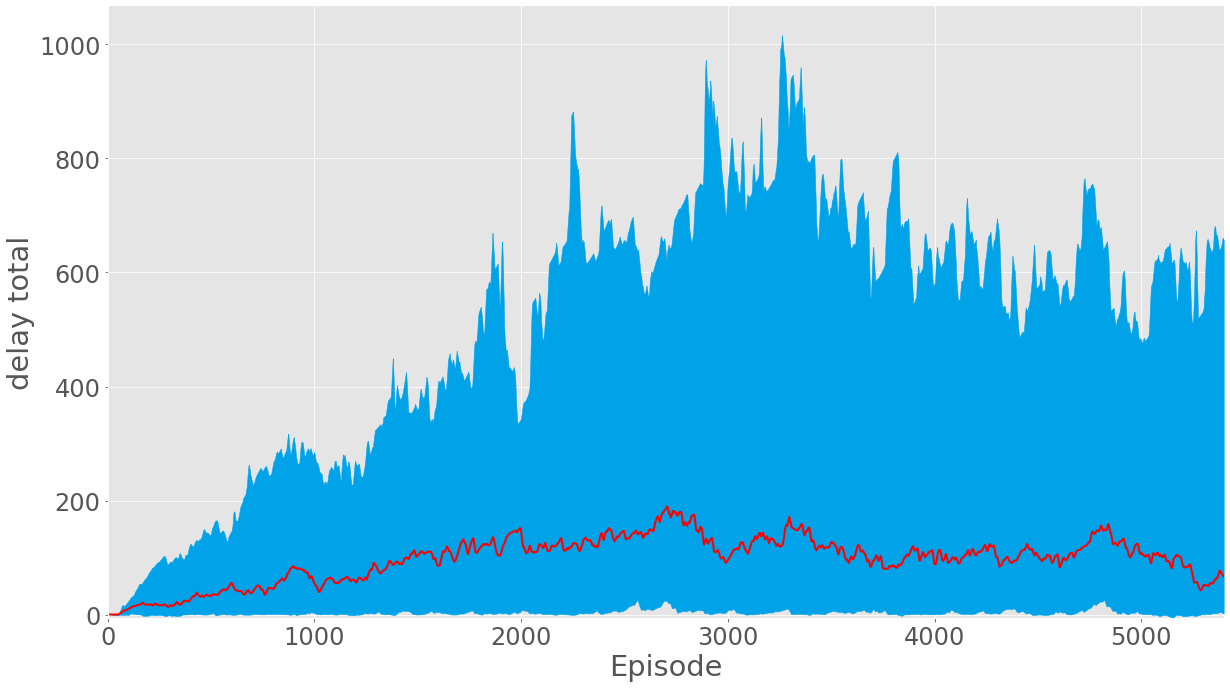

In [6]:
m = plot_this(data_delay, 'delay total')
print(m)


# median_delay = np.nanmedian(data_delay, axis=0)
# print(np.mean(median_delay))
